## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [12]:
# Preliminaries

from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [6]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [9]:
#Let's just look at a particular example to see what is inside
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
# What is the corresponding label in the training set?
y_train[333]

8

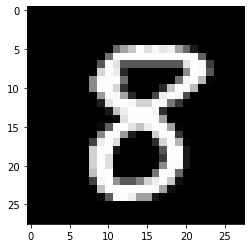

In [13]:
# Let's see what this image actually looks like
plt.imshow(x_train[333], cmap='Greys_r')

In [14]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [15]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test  = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test  /= 255

In [16]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

# now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector
y_train[333]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [34]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dropout(.2),
    Dense(64, activation='relu'),
    Dropout(.2),
    Dense(10, activation='softmax'),
])

In [35]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
               optimizer=RMSprop(lr=learning_rate),
                metrics=['accuracy'])

# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [37]:
# And now let's fit.
batch_size = 128
epochs = 30
history_1 = model_1.fit(x_train, y_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       verbose=1,
                       validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 27us/sample - loss: 0.5181 - acc: 0.8453 - val_loss: 0.2012 - val_acc: 0.9414
Epoch 2/30
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2534 - acc: 0.9261 - val_loss: 0.1541 - val_acc: 0.9549
Epoch 3/30
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1991 - acc: 0.9421 - val_loss: 0.1236 - val_acc: 0.9629
Epoch 4/30
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1684 - acc: 0.9505 - val_loss: 0.1166 - val_acc: 0.9652
Epoch 5/30
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1513 - acc: 0.9552 - val_loss: 0.1112 - val_acc: 0.9682
Epoch 6/30
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1410 - acc: 0.9585 - val_loss: 0.1008 - val_acc: 0.9714
Epoch 7/30
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1325 - acc: 0.9610 - val_loss: 0.

In [38]:
## We will use Keras evaluate function to evaluate performance on the test set
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11167453794864705
Test accuracy: 0.9766


In [39]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    



This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [40]:
### Build your model here
model_2 = Sequential([
    Dense(400, activation='relu', input_shape=(784,)),
    Dropout(.4),
    Dense(300, activation='relu'),
    Dropout(.4),
    Dense(10, activation='softmax'),
])

model_2.summary()
# model_1: 55,050
# mode_2: 437,310
# this model has 382,260 params/weights to learn

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_8 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 300)               120300    
_________________________________________________________________
dropout_9 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                3010      
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


In [41]:
learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
               optimizer=RMSprop(lr=learning_rate),
                metrics=['accuracy'])

## SOLUTION

In [42]:
batch_size = 128
epochs = 20
history_2 = model_2.fit(x_train, y_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       verbose=1,
                       validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3235 - acc: 0.9013 - val_loss: 0.1217 - val_acc: 0.9606
Epoch 2/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1492 - acc: 0.9560 - val_loss: 0.0946 - val_acc: 0.9706
Epoch 3/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1171 - acc: 0.9654 - val_loss: 0.0777 - val_acc: 0.9765
Epoch 4/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1038 - acc: 0.9695 - val_loss: 0.0829 - val_acc: 0.9771
Epoch 5/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0909 - acc: 0.9735 - val_loss: 0.0788 - val_acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0845 - acc: 0.9769 - val_loss: 0.0759 - val_acc: 0.9801
Epoch 7/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0786 - acc: 0.9776 - val_loss: 0.

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?

### 1)
Using the metric outputs for both models' final epochs
Model_1: ss: 0.0812 - acc: 0.9762 - val_loss: 0.1117 - val_acc: 0.9766
Model_2: ss: 0.0515 - acc: 0.9872 - val_loss: 0.1041 - val_acc: 0.9832

While model_2 does have a slightly larger accuracy and lower loss score, I would rather pick model_1 over model_2.  First looking at the number of parameters that must be learned, model_2 has almost 8 times the amount of parameters/weights more than model_1.  As a result training time will take longer, and as the dataset grows the difference in traiing time will become even larger.  

Looking at the epoch logs from both models it does look like the loss scores between the training and validation set for model_2 begin to diverge rather than converge as seen with model_1's validations - diverge less.  While using dropout does help prevent to overfitting, due to a large number nodes its easy for overfitting to exist, a better solution to using only 2 layers with many nodes would be to have more layers with less nodes per layer.  This concept becomes significant when talking about CNNs.

### 2)
Model_1's losses both follow a downward trend around about epoch #15 where the validation loss begins to rise again. However, while the validation does begin to rise we can expect some noise therefore we typically allow for some change in loss.  As a result, we dont flag a loss as a noticable change unless to passing a percentage change threshold.  
Model_2's loss seems to diverge even earlier in the training phase. We end up seeing the gap between the training and validation sets widden at each epoch.

Looking at each model's accuracy history it seems that model_1's training and validation accuracies converge, however, model_2's diverge with the training accuracy surpassing the validation accuracy. While its expected that validation sets wont perform to the same level as the training sets I believe if we were to continue running through the training set the validation metrics will get worse.

While accuracy is a common metric there are many others used to compare models (precession, recall, F1).  Typically one would switch out which metric to use for comparing models based on requirements.  For instance if we are more worried about false positives we would want to compare models based on their precision score. Regardless of which metric one choose the loss function could be the same (we generally change it based on using a regression model, binary classifier, or multiclass classifier) therefore, in general I would rather use the loss score to compare models.

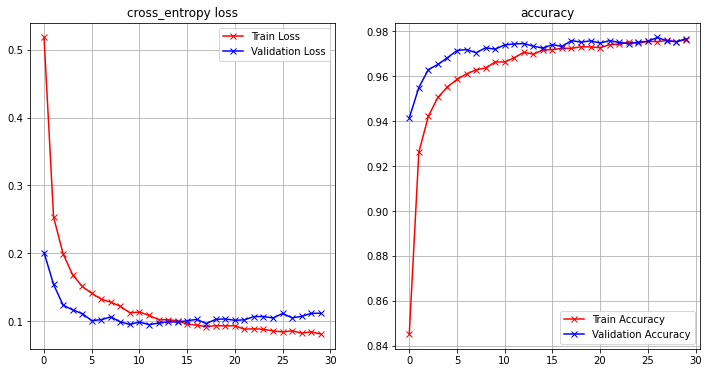

In [45]:
# model_1 history
plot_loss_accuracy(history_1)

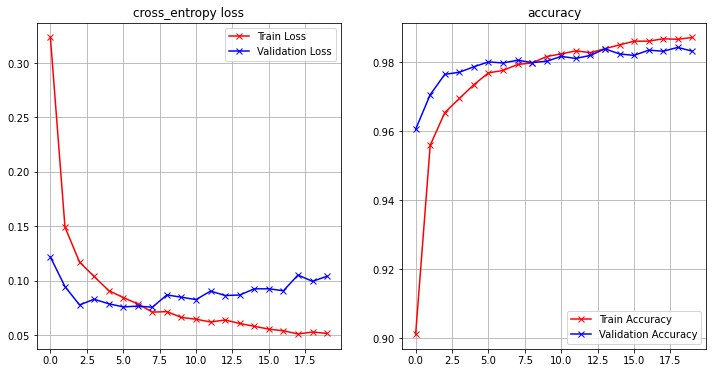

In [46]:
# mode_2 history
plot_loss_accuracy(history_2)